# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [133]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Challenge 1

#### The data we will use in this challenge is:

In [134]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

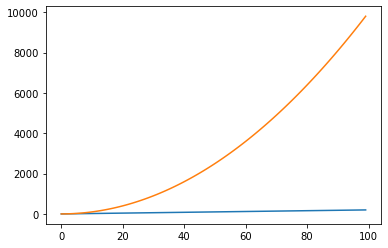

In [135]:
# Method 1
plt.plot(x,y)
plt.plot(x,z)

#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

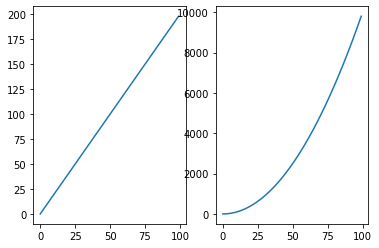

In [136]:
# Method 2
fig, ax=plt.subplots(nrows=1, ncols=2)
ax[0].plot(x,y)
ax[1].plot(x,z)



#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

Text(0, 0.5, 'X²')

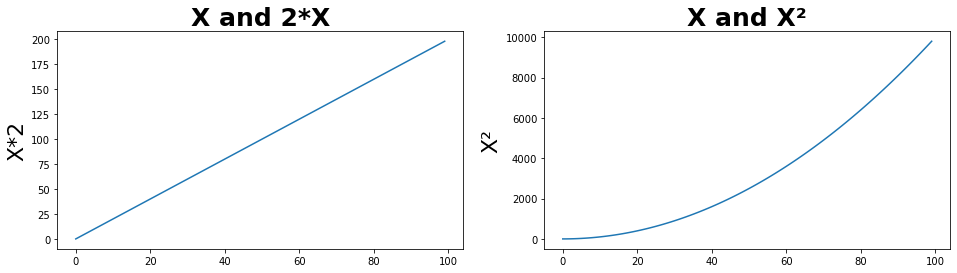

In [137]:
# your code here
fig, ax=plt.subplots(nrows=1, ncols=2,figsize=(16,4))
ax[0].plot(x,y,'-')
ax[0].set_title('X and 2*X',fontweight='bold', fontsize=25)
ax[0].set_ylabel('X*2', fontsize=22)
ax[1].plot(x,z)
ax[1].set_title('X and X²',fontweight='bold', fontsize=25)
ax[1].set_ylabel('X²', fontsize=22)

#### Now you will have to plot both $y=x^2$ and $y=e^x$ in the same plot. Create two subplots and use a normal scale in the first one and a logarithmic scale in the second one.
**Hint**: Use `set_xscale` and `set_yscale`.

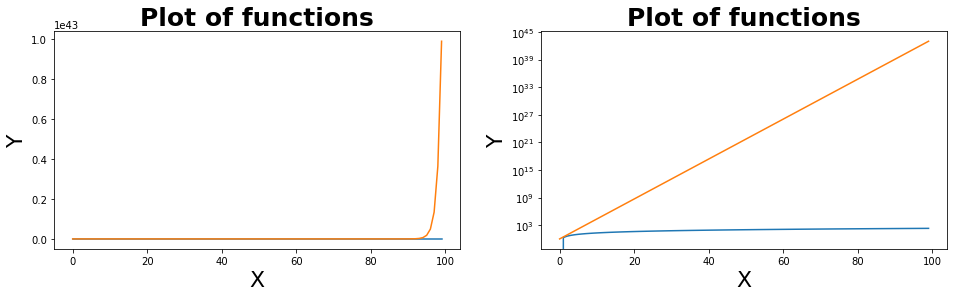

In [138]:
# your code here
x = np.arange(0,100)
y = x*2
z = (np.exp(1))**x

fig, ax=plt.subplots(nrows=1, ncols=2,figsize=(16,4))
ax[0].plot(x,y,'-')
ax[0].plot(x,z,'-')
ax[0].set_title('Plot of functions',fontweight='bold', fontsize=25)
ax[0].set_ylabel('Y', fontsize=22)
ax[0].set_xlabel('X', fontsize=22)
ax[0].set_yscale('linear')
ax[1].plot(x,y,'-')
ax[1].plot(x,z,'-')
ax[1].set_title('Plot of functions',fontweight='bold', fontsize=25)
ax[1].set_ylabel('Y', fontsize=22)
ax[1].set_xlabel('X', fontsize=22)
ax[1].set_yscale('log')


#### As a bonus challenge, try to add a legend to the plot.

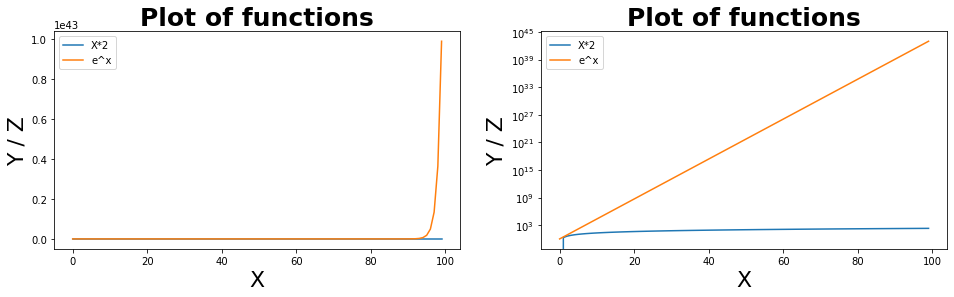

In [139]:
# your code here
fig, ax=plt.subplots(nrows=1, ncols=2,figsize=(16,4))
l1, =ax[0].plot(x,y,'-')
l2, =ax[0].plot(x,z,'-')
ax[0].set_title('Plot of functions',fontweight='bold', fontsize=25)
ax[0].set_ylabel('Y / Z', fontsize=22)
ax[0].set_xlabel('X', fontsize=22)
ax[0].set_yscale('linear')
ax[0].legend((l1,l2),('X*2','e^x'), loc='best')
ax[1].plot(x,y,'-')
ax[1].plot(x,z,'-')
ax[1].set_title('Plot of functions',fontweight='bold', fontsize=25)
ax[1].set_ylabel('Y / Z', fontsize=22)
ax[1].set_xlabel('X', fontsize=22)
ax[1].set_yscale('log')
ax[1].legend((l1,l2),('X*2','e^x'), loc='best')

## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [140]:
# your code here
path='../../../../../Downloads/fitbit2.csv'
fitbit = pd.read_csv(path)

fitbit


,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,2016-05-03,3796,18588,14.13,16,599.000,275,49,79,236,...,8.779972,Tuesday,1.0,1,6.283333,91.951220,5.233333,90.229885,May,5
363,2016-05-04,3525,16382,12.39,16,684.000,333,10,55,2075,...,7.698787,Wednesday,2.0,1,6.766667,95.081967,6.283333,91.951220,May,5
364,2016-05-05,3649,21913,16.40,19,701.000,287,29,90,2249,...,10.190484,Thursday,3.0,1,4.666667,88.888889,6.766667,95.081967,May,5
365,2016-05-06,3539,19023,14.79,15,575.000,298,8,85,2112,...,9.190077,Friday,4.0,1,6.166667,89.805825,4.666667,88.888889,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

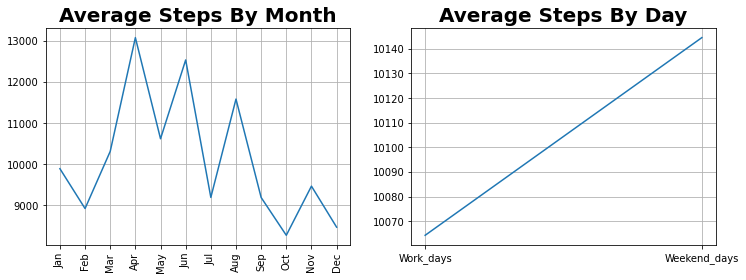

In [141]:
# MEDIAN STEPS BY MONTH_ENCODED
# your code here
import numpy as np 
import matplotlib.pyplot as plt 

grp1=fitbit[['Steps','Months_encoded']].groupby(['Months_encoded']).mean()

fig, ax=plt.subplots(nrows=1, ncols=2,figsize=(12,4))

x=list(grp1.index)
y=list(grp1.Steps)
labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

plt.sca(ax[0])
plt.plot(x,y)
plt.grid()
plt.xticks(x, labels, rotation='vertical')
plt.title('Average Steps By Month',fontweight='bold', fontsize=20)

# MEDIAN STEPS BY WORK_OR_WEEKEND
# your code here
grp2=fitbit[['Steps','Work_or_Weekend']].groupby(['Work_or_Weekend']).mean()

x=list(grp2.index)
y=list(grp2.Steps)
labels=['Work_days','Weekend_days']

plt.sca(ax[1])
plt.plot(x,y)
plt.grid()
plt.xticks(x, labels, rotation='horizontal')
plt.title('Average Steps By Day',fontweight='bold', fontsize=20)

plt.savefig('./figures/figure_fitbit_01.pdf', format='pdf')
plt.show()



#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

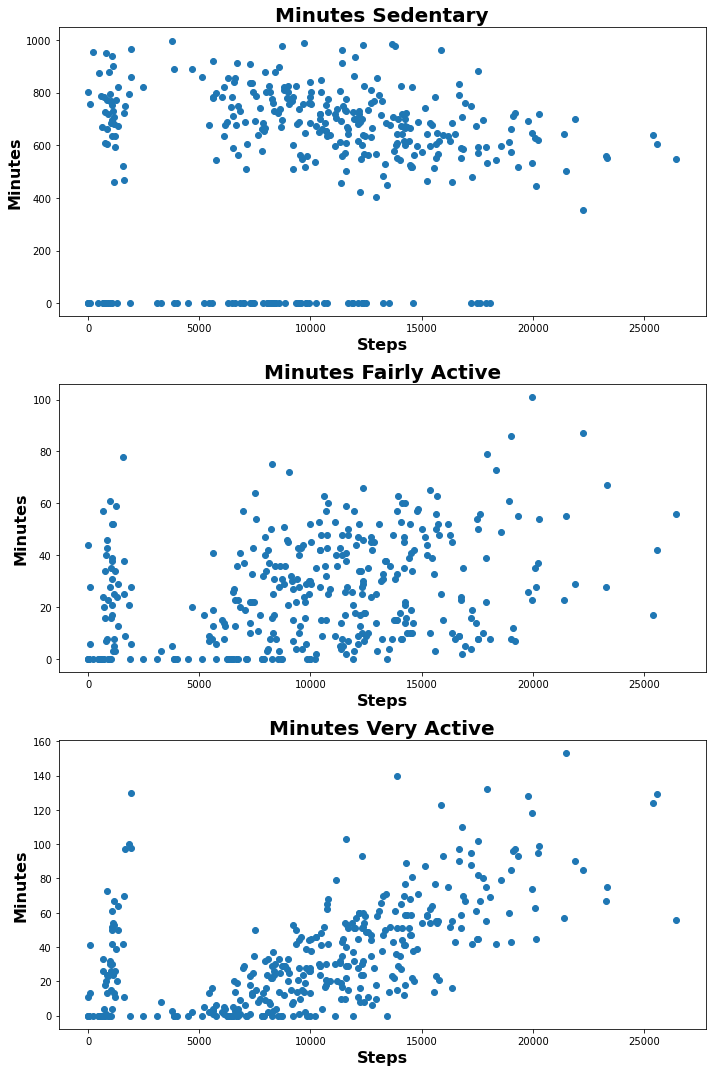

In [142]:
# your code here

grp=fitbit[['Steps','Minutes Sedentary','Minutes Fairly Active','Minutes Very Active']]
tit=list(grp.columns)
x=list(fitbit['Steps'])
y=[list(fitbit['Minutes Sedentary']),list(fitbit['Minutes Fairly Active']),list(fitbit['Minutes Very Active'])]

fig, ax=plt.subplots(nrows=3, ncols=1,figsize=(10,15))

for i in range(3):
    plt.sca(ax[i])
    plt.scatter(x,y[i])
    plt.title(tit[i+1],fontweight='bold', fontsize=20)
    plt.ylabel('Minutes', fontweight='bold', fontsize=16)
    plt.xlabel('Steps', fontweight='bold', fontsize=16)


plt.tight_layout()
plt.show()
    

## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [143]:
# your code here
path='../../../../../Downloads/titanic.csv'
titanic = pd.read_csv(path)
titanic

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,U0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,29.513190,0,0,A.5. 3236,8.0500,U0,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,U0,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,29.513190,0,0,359309,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [144]:
# your code here
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [145]:
# NUMERICAL VARIABLES
# your code here

titanic.select_dtypes(exclude='object')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.000000,1,0,7.2500
1,2,1.0,1,38.000000,1,0,71.2833
2,3,1.0,3,26.000000,0,0,7.9250
3,4,1.0,1,35.000000,1,0,53.1000
4,5,0.0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,NaN,3,29.513190,0,0,8.0500
1305,1306,NaN,1,39.000000,0,0,108.9000
1306,1307,NaN,3,38.500000,0,0,7.2500
1307,1308,NaN,3,29.513190,0,0,8.0500


In [146]:
# CATEGORICAL VARIABLES
# your code here

titanic.select_dtypes(include='object')

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S
...,...,...,...,...,...
1304,"Spector, Mr. Woolf",male,A.5. 3236,U0,S
1305,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
1306,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,U0,S
1307,"Ware, Mr. Frederick",male,359309,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [167]:
# your code here
plt.style.use('classic')
fig=plt.figure(figsize=(12,6))


<Figure size 960x480 with 0 Axes>

#### Use the right visulalization to show the distribution of column `Age`.

(array([ 22.,  19.,  10.,  11.,  10.,  13.,   8.,   8.,  23.,  26.,  20.,
         75.,  29.,  93., 109.,  43.,  72.,  68., 111.,  53.,  71.,  47.,
         35.,  24.,  43.,  26.,  29.,  15.,  35.,  31.,  15.,  26.,   7.,
         14.,  13.,   5.,   9.,   8.,  11.,   9.,   3.,   2.,   0.,   2.,
          3.,   0.,   1.,   1.,   0.,   1.]),
 array([ 0.17  ,  1.7666,  3.3632,  4.9598,  6.5564,  8.153 ,  9.7496,
        11.3462, 12.9428, 14.5394, 16.136 , 17.7326, 19.3292, 20.9258,
        22.5224, 24.119 , 25.7156, 27.3122, 28.9088, 30.5054, 32.102 ,
        33.6986, 35.2952, 36.8918, 38.4884, 40.085 , 41.6816, 43.2782,
        44.8748, 46.4714, 48.068 , 49.6646, 51.2612, 52.8578, 54.4544,
        56.051 , 57.6476, 59.2442, 60.8408, 62.4374, 64.034 , 65.6306,
        67.2272, 68.8238, 70.4204, 72.017 , 73.6136, 75.2102, 76.8068,
        78.4034, 80.    ]),
 <a list of 50 Patch objects>)

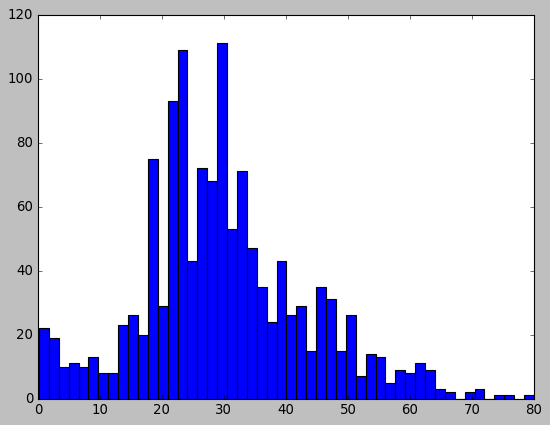

In [174]:
# your code here
x=titanic['Age'].to_list()
plt.hist(x,bins=50)

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

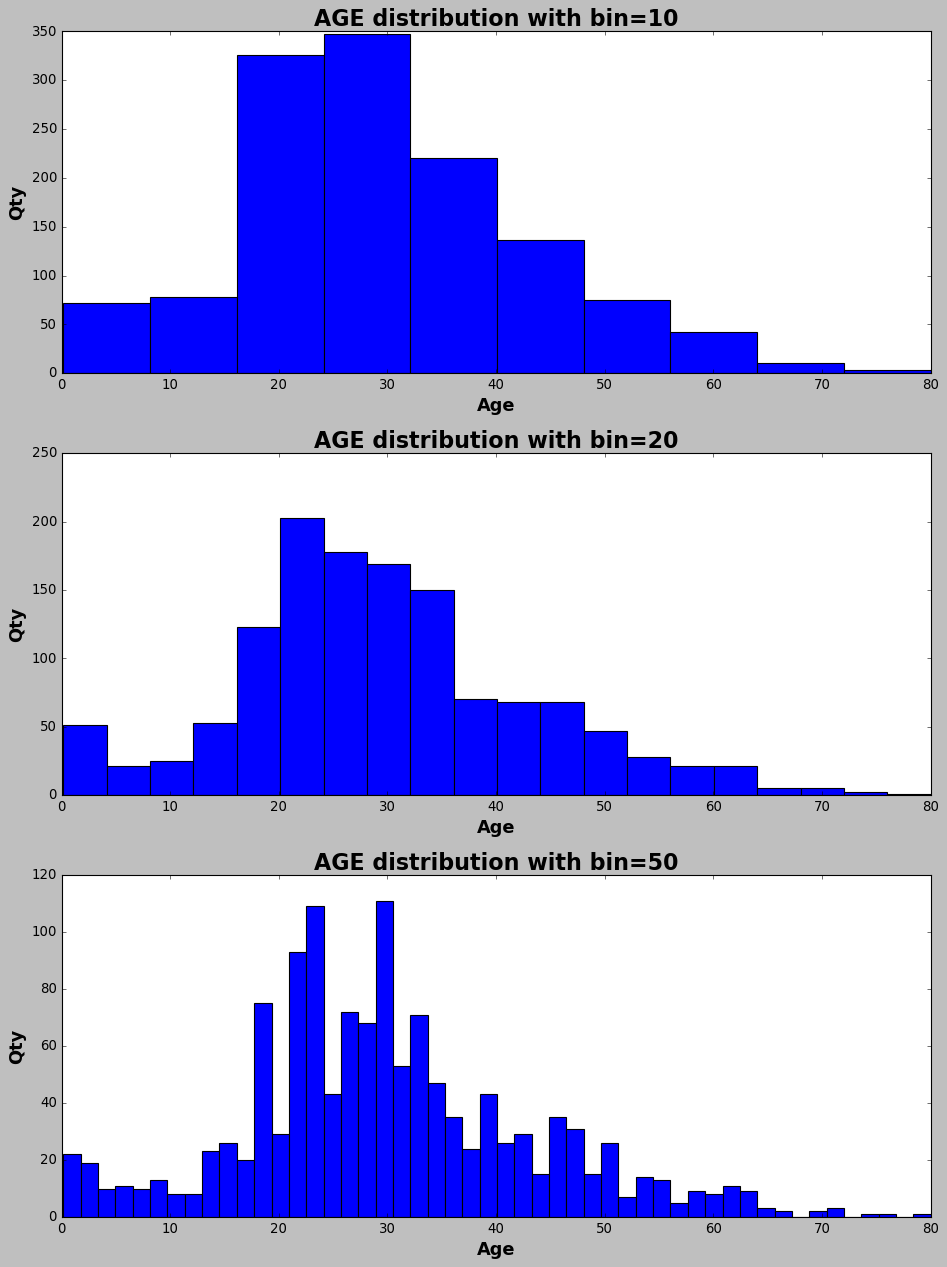

In [179]:
# your code here
fig, ax=plt.subplots(nrows=3, ncols=1,figsize=(12,16))
bins=[10,20,50]
for i in range(3):
    plt.sca(ax[i])
    plt.hist(x,bins=bins[i])
    plt.title(f'AGE distribution with bin={bins[i]}',fontweight='bold', fontsize=20)
    plt.ylabel('Qty', fontweight='bold', fontsize=16)
    plt.xlabel('Age', fontweight='bold', fontsize=16)
plt.tight_layout()
plt.show()

#### How does the bin size affect your plot?

In [ ]:
"""
your comments here

According to bin size, the bigger size, the highest histogram. This distribution is similar to normal distribution, so if bin size is small
the distribution will be flat and if bin size is big the distribution will be pointed in the middle.

"""

#### Use seaborn to show the distribution of column `Age`.

Text(0.5, 1.0, 'Age distribution with bin=20')

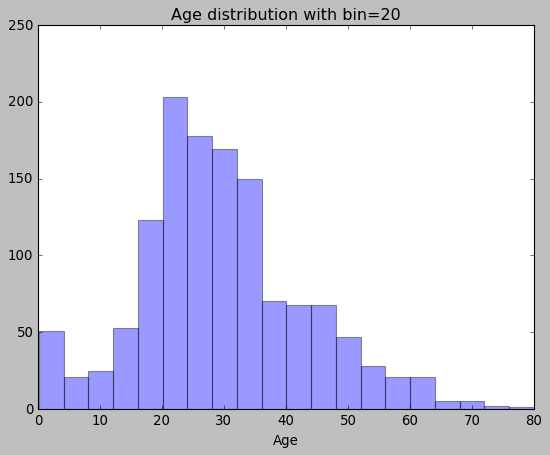

In [195]:
# your code here
x=titanic['Age'].to_list()
ax = sns.distplot(x, bins=20, kde=False, axlabel='Age')
plt.gca()
ax.set_title('Age distribution with bin=20')

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

Text(0.5, 1.0, 'Gender distribution in Titanic')

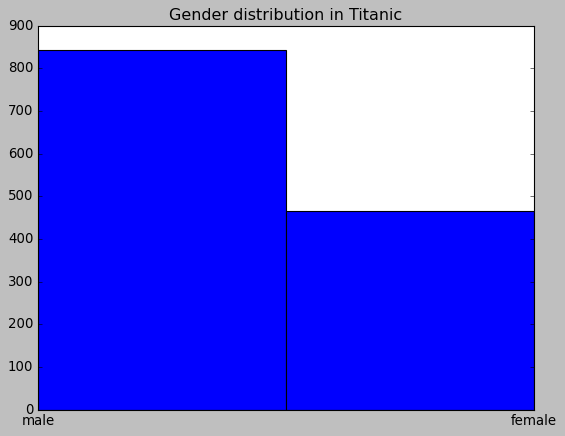

In [216]:
# Method 1 - matplotlib
# your code here

x=titanic['Gender'].to_list()
plt.hist(x, bins=2)
plt.title('Gender distribution in Titanic')

[Text(0.5, 1.0, 'Gender distribution in Titanic')]

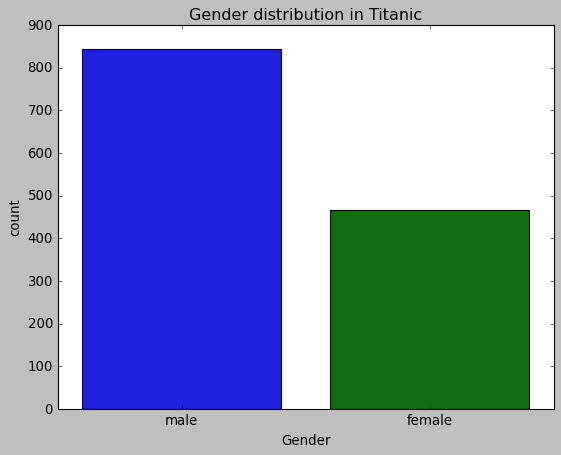

In [220]:
# Method 2 - seaborn
# your code here

ax=sns.countplot(data=titanic, x='Gender')
ax.set(title='Gender distribution in Titanic')

#### Use the right plot to visualize the column `Pclass`.

[Text(0.5, 1.0, 'Pclass distribution in Titanic')]

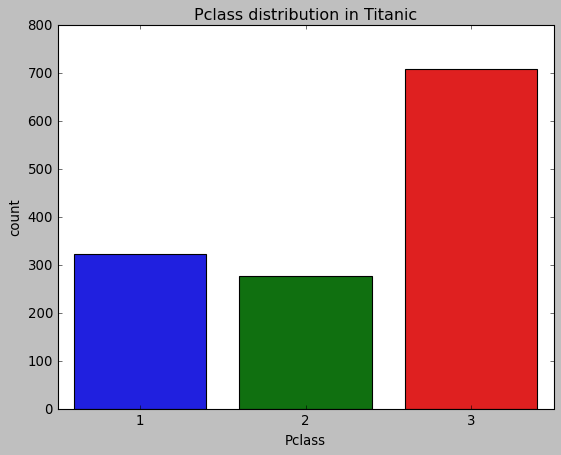

In [219]:
# your code here

ax=sns.countplot(data=titanic, x='Pclass')
ax.set(title='Pclass distribution in Titanic')

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

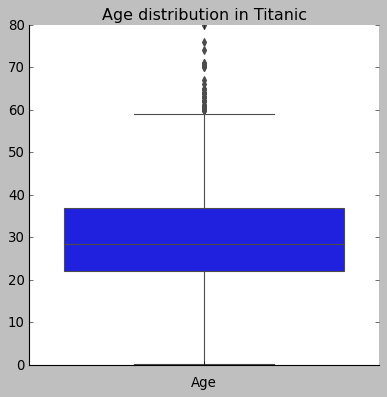

In [226]:
# your code here

ax=sns.catplot(x='Age', kind='box', data=titanic, orient='v')
ax.set(title='Age distribution in Titanic')

In [ ]:
"""
your comments here

You can see in this violinplot the followin information,
Median= in the point in the middle of the blue box (about 29 years) 
Interquartile range= in the blue box in the center of the plot (this should represent the 50% of the population between 22 and 38 years)
The “whiskers” extend to points that lie within 1.5 IQRs of the lower (25%) and upper (75%) quartile.
The poinst outliners are outside the main range.

"""

#### What does the last plot tell you about the feature `Age`?

In [ ]:
"""
your comments here

Most of the population (50%) were between 21 and 38 years. The rest of the population (until more tha 95%) are extended between 0 and 60 years.

"""

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

[Text(0.5, 1.0, 'Age distribution in Titanic')]

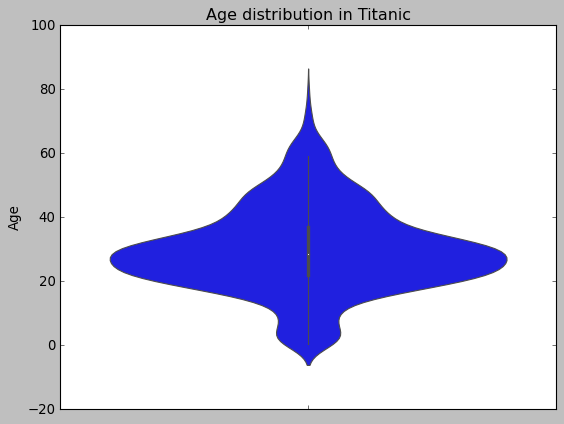

In [227]:
# your code here
ax=sns.violinplot(x='Age', data=titanic, orient='v')
ax.set(title='Age distribution in Titanic')


#### What additional information does the last plot provide about feature `Age`?

In [ ]:
"""
your comments here

You can see in this violinplot the followin information,
Median= in the point in the middle of the plot
Interquartile range= in the thinner black line in the center of the plot (this should represent the 50% of the population)
The width of violin= represent the frecuency that you can see the evolution
Max= end of the black line on the top
Min= beginning of the black line on the bottom
This plot is like a double histogram (simetric graph)


"""

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

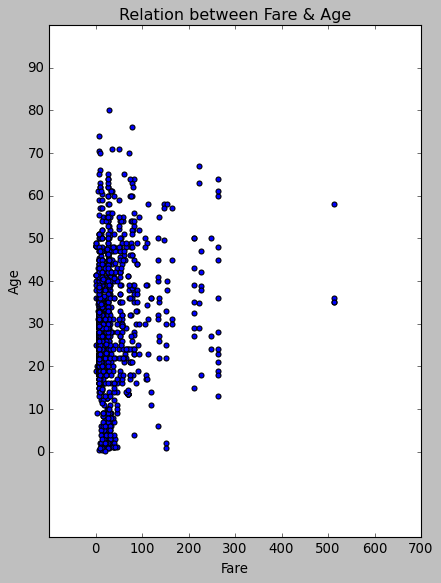

In [245]:
# Method 1 - matplotlib
# your code here

x=list(titanic['Fare'])
y=list(titanic['Age'])

fig=plt.figure(figsize=(6,8))
plt.scatter(x,y)
plt.xticks(np.arange(0,800,step=100))
plt.yticks(np.arange(0,100,step=10))
plt.title('Relation between Fare & Age')
plt.xlabel('Fare')
plt.ylabel('Age')
plt.show()

[Text(0.5, 1.0, 'Fare / Age relation in Titanic')]

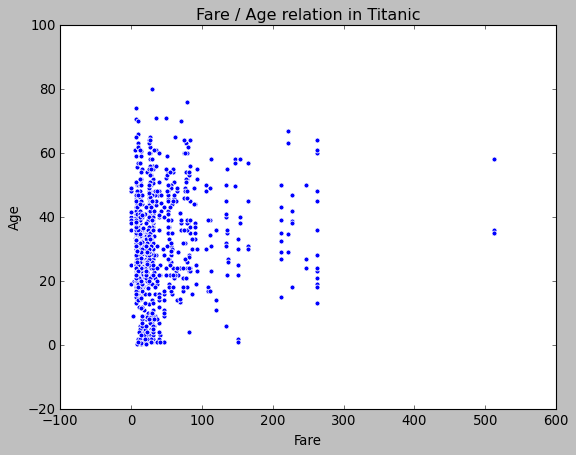

In [248]:
# Method 2 - seaborn
# your code here

ax=sns.scatterplot(x='Fare',y='Age', data=titanic)
ax.set(title='Fare / Age relation in Titanic')

#### Plot the correlation matrix using seaborn.

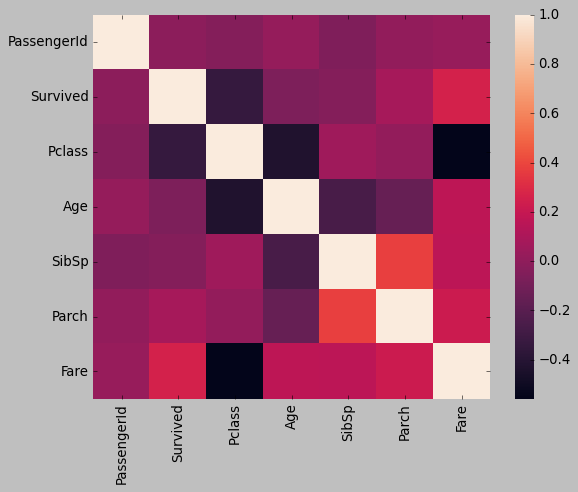

In [249]:
# your code here
correlation_matrix=titanic.corr()
sns.heatmap(correlation_matrix,xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns)

#### What are the most correlated features?

In [ ]:
"""
your comments here

The most correlated features are Parch and SibSp

"""

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

[Text(0.5, 1.0, 'Age & Pclass statistics in Titanic')]

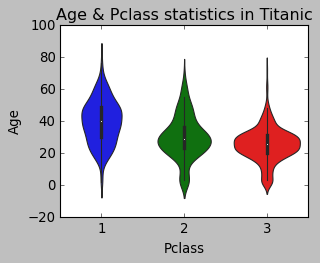

In [264]:
# your code here
fig=plt.figure(figsize=(4,3))
ax=sns.violinplot(y='Age', x='Pclass', data=titanic, orient='v')
ax.set(title='Age & Pclass statistics in Titanic')

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

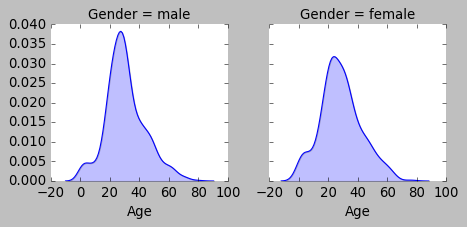

In [263]:
# your code here

g = sns.FacetGrid(titanic, col="Gender")
g.map(sns.kdeplot, "Age", shade=True)
sns.despine(left=True, bottom=True)
plt.show()
